In [20]:
from pyckmeans import MultiCKMeans
import sklearn.datasets
import math
import pandas as pd
# import tensorflow as tf
# # import keras_tuner.tuners as kt
# import matplotlib.pyplot as plt
# import keras
# from tensorflow.keras import Model
# from tensorflow.keras import Sequential
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
# np.random.seed(0)
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# # https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
# from tensorflow.keras import initializers
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import multivariate_normal
# from keras.optimizers import Adam, SGD, Adadelta


In [35]:
x_train_scaled = pd.read_csv('../260_sample_train_scaled.csv').set_index("Patient_ID")
x_train_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.209212,0.301844,0.0,0.643267,0.143476,0.0,0.262892,0.189790,0.0,0.0
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.408592,0.042243,0.0,0.765285,0.527984,0.0,0.413798,0.270021,0.0,0.0
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.514164,0.364434,0.0,0.930260,0.481733,0.0,0.273699,0.433093,0.0,0.0


In [36]:
x_test_scaled = pd.read_csv('../260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [41]:
full_ds = pd.concat([x_train_scaled, x_test_scaled])
full_ds

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [64]:
# gene_df_shap = pd.DataFrame(shap_values[2], index=x_test_scaled.index, columns = x_test_scaled.columns)
df_cd_deep = full_ds[full_ds.index.str.endswith('_CD_deep_ulcer')]
df_cd_plain = full_ds[full_ds.index.str.endswith('_CD_plain')]
df_control = full_ds[full_ds.index.str.endswith('_control')]
df_cd_deep

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
254_CD_deep_ulcer,0.688952,0.790972,0.730387,0.698611,0.814798,0.539765,0.476091,0.531103,0.643682,0.557025,...,0.476719,0.184970,0.0,0.775218,0.735266,0.0,0.704568,0.123324,0.0,0.0
216_CD_deep_ulcer,0.392511,0.306222,0.540222,0.462697,0.430877,0.751154,0.073092,0.495681,0.926051,0.333960,...,0.369116,0.333629,0.0,0.891666,0.800409,0.0,0.237463,0.283500,0.0,0.0
263_CD_deep_ulcer,0.269897,0.214387,0.187335,0.158953,0.180396,0.856687,0.000000,0.274659,0.916233,0.329184,...,0.270190,0.298015,0.0,0.923640,0.792649,0.0,0.219626,0.346916,0.0,0.0
95_CD_deep_ulcer,0.322076,0.317311,0.295913,0.189476,0.222371,0.635286,0.186784,0.809517,0.583656,0.224686,...,0.303707,0.303852,0.0,0.879256,0.000000,0.0,0.604292,0.537487,0.0,0.0
223_CD_deep_ulcer,0.697044,0.615143,0.670016,0.731387,0.602704,0.613085,0.000000,0.321284,0.676704,0.632284,...,0.375039,0.183690,0.0,0.632584,0.326867,0.0,0.270089,0.273007,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145_CD_deep_ulcer,0.580654,0.316558,0.463705,0.469550,0.382367,0.548972,0.146997,0.372269,0.697253,0.267339,...,0.490994,0.126773,0.0,0.793213,0.461123,0.0,0.511221,0.252387,0.0,0.0
143_CD_deep_ulcer,0.524637,0.358230,0.463575,0.519032,0.484028,0.641028,0.171927,0.547367,0.820735,0.317961,...,0.349235,0.227870,0.0,0.815527,0.225366,0.0,0.536963,0.431498,0.0,0.0
165_CD_deep_ulcer,0.631350,0.589925,0.672493,0.684450,0.603240,0.642262,0.547043,0.142334,0.726706,0.604319,...,0.442088,0.300797,0.0,0.867680,0.460396,0.0,0.331986,0.340875,0.0,0.0


# Pre-processing dataset

In [38]:
with open("../shap_values", "rb") as fp:   # Unpickling
    shap_values = pickle.load(fp)

In [42]:
gene_df_shap = pd.DataFrame(shap_values[2], index=x_test_scaled.index, columns = x_test_scaled.columns)
df_train_cd_deep_shap = gene_df_shap[gene_df_shap.index.str.endswith('_CD_deep_ulcer')]
df_train_cd_plain_shap = gene_df_shap[gene_df_shap.index.str.endswith('_CD_plain')]
df_train_control_shap = gene_df_shap[gene_df_shap.index.str.endswith('_control')]
df_train_cd_deep_shap.describe()

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.0,24.000000,24.000000,24.0,24.000000,24.000000,24.0,24.000000
mean,-0.005488,0.040611,-0.005575,-0.000069,0.002390,0.021644,0.009004,-0.009872,-0.015163,-0.010056,...,0.000655,-0.000116,0.0,-0.006163,0.014611,0.0,-0.009578,-0.003485,0.0,-0.001301
std,0.018029,0.088382,0.026842,0.023348,0.017107,0.099260,0.132716,0.038586,0.030030,0.041562,...,0.016781,0.014662,0.0,0.010403,0.050435,0.0,0.021956,0.034413,0.0,0.007393
min,-0.029188,-0.155963,-0.075338,-0.043207,-0.034509,-0.204027,-0.444209,-0.098122,-0.079742,-0.078440,...,-0.026184,-0.024701,0.0,-0.029285,-0.060600,0.0,-0.047300,-0.111352,0.0,-0.028094
25%,-0.015386,-0.011005,-0.018520,-0.015541,-0.003726,-0.006246,-0.008077,-0.022919,-0.034223,-0.035127,...,-0.010797,-0.010993,0.0,-0.011750,-0.013405,0.0,-0.025683,-0.009372,0.0,-0.004291
50%,-0.009074,0.066847,0.001413,0.001891,0.005660,0.023090,0.045840,-0.017140,-0.011740,-0.016870,...,0.000000,0.002637,0.0,-0.005696,-0.002227,0.0,-0.007431,0.000000,0.0,0.000000
75%,0.000000,0.109386,0.012167,0.013046,0.013580,0.071640,0.083162,-0.007134,0.000303,0.009142,...,0.005825,0.013231,0.0,0.000589,0.024293,0.0,0.000619,0.016011,0.0,0.002417
max,0.046328,0.152192,0.033261,0.058560,0.027500,0.267737,0.199305,0.089633,0.055102,0.097402,...,0.056264,0.020498,0.0,0.009995,0.182840,0.0,0.029404,0.073698,0.0,0.009729


# CD Deep Ulcer

In [53]:
gene_shap_means = df_train_cd_deep_shap.describe().loc["mean"].values
gene_shap_means_abs = np.abs(gene_shap_means)
gene_shap_means_abs

array([5.48793948e-03, 4.06111937e-02, 5.57527590e-03, 6.92948696e-05,
       2.38968441e-03, 2.16435782e-02, 9.00373075e-03, 9.87161084e-03,
       1.51631768e-02, 1.00556022e-02, 4.29252517e-03, 1.53620278e-03,
       4.09593754e-03, 3.15711795e-03, 1.31471488e-02, 1.17094025e-02,
       1.99371684e-04, 2.25880101e-03, 1.48855571e-02, 3.74201476e-02,
       5.25255105e-03, 1.33562627e-02, 1.52794408e-02, 1.99447280e-02,
       2.27681232e-02, 1.01028084e-02, 2.64349680e-02, 6.00267202e-03,
       8.42546708e-03, 1.95803657e-03, 2.56132262e-03, 1.19782871e-02,
       8.01831518e-03, 4.11356358e-03, 9.62863789e-03, 1.26225924e-03,
       2.07431950e-02, 2.15625644e-02, 6.87573542e-03, 1.87896941e-03,
       2.09019826e-02, 2.83650009e-03, 1.06123955e-02, 8.87784236e-03,
       3.06104036e-03, 1.28825341e-04, 3.56616183e-02, 1.45073503e-02,
       4.50460419e-04, 4.25644485e-04, 2.92205687e-03, 2.49363127e-02,
       6.57986659e-05, 4.06498544e-02, 3.10089792e-02, 5.25438583e-02,
      

In [40]:
gene_exp_train_df = x_train_scaled.copy()
gene_exp_train_df

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.209212,0.301844,0.0,0.643267,0.143476,0.0,0.262892,0.189790,0.0,0.0
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.408592,0.042243,0.0,0.765285,0.527984,0.0,0.413798,0.270021,0.0,0.0
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.514164,0.364434,0.0,0.930260,0.481733,0.0,0.273699,0.433093,0.0,0.0


In [131]:
gene_exp_train_proc = gene_exp_train_df.multiply(gene_shap_means_abs, axis='columns').T
gene_exp_train_proc

Patient_ID,55_control,168_CD_plain,72_control,120_control,258_CD_plain,254_CD_deep_ulcer,9_CD_plain,111_CD_plain,57_CD_plain,216_CD_deep_ulcer,...,303_CD_plain,35_control,148_CD_deep_ulcer,28_control,67_control,15_CD_plain,182_CD_plain,164_CD_plain,53_CD_plain,97_CD_plain
AADAC,0.003857,0.004124,0.004316,0.003883,0.003847,0.003781,0.003441,0.003248,0.004262,0.002154,...,0.004290,0.004768,0.004505,0.005013,0.005136,0.002101,0.003731,0.004142,0.003244,0.004484
APOA1,0.032450,0.024517,0.030675,0.026925,0.026905,0.032122,0.019774,0.027523,0.031538,0.012436,...,0.028689,0.031562,0.036468,0.035478,0.034462,0.015596,0.023746,0.022603,0.023790,0.031767
APOA4,0.004012,0.003472,0.004124,0.003613,0.003943,0.004072,0.003825,0.003499,0.004559,0.003012,...,0.004250,0.004642,0.005213,0.005060,0.004764,0.002104,0.004028,0.003870,0.004183,0.004764
APOB,0.000051,0.000043,0.000052,0.000053,0.000058,0.000048,0.000039,0.000038,0.000048,0.000032,...,0.000057,0.000057,0.000057,0.000057,0.000060,0.000025,0.000045,0.000052,0.000052,0.000060
APOC3,0.001900,0.001450,0.001959,0.001564,0.001601,0.001947,0.001521,0.001602,0.002136,0.001030,...,0.001600,0.001731,0.002197,0.002038,0.001998,0.000719,0.001768,0.001280,0.001442,0.001896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSL24D1P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIEN1,0.005202,0.005975,0.008171,0.003760,0.002489,0.006748,0.003602,0.007187,0.007603,0.002274,...,0.002281,0.003207,0.009578,0.006346,0.005207,0.002518,0.003963,0.002622,0.001760,0.005377
PCBP1_AS1,0.002170,0.001050,0.001502,0.001361,0.001505,0.000430,0.000842,0.001864,0.001532,0.000988,...,0.001278,0.000764,0.001880,0.001192,0.001365,0.000661,0.000941,0.001509,0.001053,0.000094
LOC100133165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [132]:
gene_exp_test_df = x_test_scaled.copy()
gene_exp_test_df

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [133]:
gene_exp_test_proc = gene_exp_test_df.multiply(gene_shap_means_abs, axis='columns').T
gene_exp_test_proc

Patient_ID,253_CD_plain,105_CD_plain,2_CD_plain,184_CD_plain,312_CD_plain,271_CD_plain,62_CD_deep_ulcer,167_CD_deep_ulcer,196_CD_deep_ulcer,34_control,...,321_CD_plain,12_CD_plain,165_CD_deep_ulcer,286_CD_plain,89_control,107_CD_plain,279_CD_plain,179_CD_plain,70_CD_deep_ulcer,256_CD_deep_ulcer
AADAC,0.004770,0.004684,0.000908,0.003936,0.004007,0.004766,0.002406,0.002747,0.002732,0.004705,...,0.003968,0.004523,0.003465,0.005018,0.005021,0.004040,0.001211,0.003976,0.002680,0.003345
APOA1,0.034190,0.037912,0.005745,0.026816,0.029358,0.038678,0.016409,0.013306,0.013885,0.035655,...,0.027023,0.029232,0.023958,0.037402,0.033583,0.026732,0.008207,0.029515,0.020120,0.024323
APOA4,0.005186,0.005253,0.001470,0.004290,0.003976,0.005198,0.002394,0.002418,0.001971,0.005091,...,0.004465,0.004154,0.003749,0.005403,0.004770,0.004306,0.001019,0.004276,0.003205,0.003803
APOB,0.000061,0.000055,0.000014,0.000052,0.000052,0.000057,0.000025,0.000035,0.000027,0.000051,...,0.000050,0.000058,0.000047,0.000064,0.000064,0.000048,0.000008,0.000054,0.000034,0.000053
APOC3,0.001997,0.002128,0.000384,0.001661,0.001623,0.002330,0.000871,0.000880,0.000732,0.002039,...,0.001808,0.001750,0.001442,0.002342,0.001907,0.001574,0.000253,0.001650,0.001291,0.001549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSL24D1P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIEN1,0.004779,0.006677,0.003104,0.003744,0.001754,0.009338,0.003445,0.004585,0.003778,0.006200,...,0.005243,0.002258,0.003180,0.008879,0.004590,0.003875,0.003805,0.002484,0.004443,0.003307
PCBP1_AS1,0.001220,0.000935,0.001307,0.000647,0.000946,0.001243,0.001017,0.000950,0.000958,0.001078,...,0.000796,0.000761,0.001188,0.001778,0.001166,0.000664,0.000216,0.001642,0.001442,0.001325
LOC100133165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
# process only for CD deep ulcer
df_cd_deep_proc = df_cd_deep.multiply(gene_shap_means_abs, axis='columns').T
df_cd_deep_proc

Patient_ID,254_CD_deep_ulcer,216_CD_deep_ulcer,263_CD_deep_ulcer,95_CD_deep_ulcer,223_CD_deep_ulcer,99_CD_deep_ulcer,296_CD_deep_ulcer,219_CD_deep_ulcer,138_CD_deep_ulcer,146_CD_deep_ulcer,...,212_CD_deep_ulcer,230_CD_deep_ulcer,259_CD_deep_ulcer,59_CD_deep_ulcer,98_CD_deep_ulcer,145_CD_deep_ulcer,143_CD_deep_ulcer,165_CD_deep_ulcer,70_CD_deep_ulcer,256_CD_deep_ulcer
AADAC,0.003781,0.002154,0.001481,0.001768,0.003825,0.001233,0.002713,0.004695,0.003456,0.003166,...,0.004718,0.002814,0.001819,0.004739,0.001553,0.003187,0.002879,0.003465,0.002680,0.003345
APOA1,0.032122,0.012436,0.008707,0.012886,0.024982,0.006483,0.018145,0.028532,0.026411,0.015474,...,0.030646,0.009718,0.016545,0.033097,0.012408,0.012856,0.014548,0.023958,0.020120,0.024323
APOA4,0.004072,0.003012,0.001044,0.001650,0.003736,0.000848,0.002853,0.004185,0.004456,0.002814,...,0.004531,0.001826,0.002470,0.004657,0.001872,0.002585,0.002585,0.003749,0.003205,0.003803
APOB,0.000048,0.000032,0.000011,0.000013,0.000051,0.000008,0.000036,0.000057,0.000047,0.000032,...,0.000060,0.000032,0.000026,0.000064,0.000016,0.000033,0.000036,0.000047,0.000034,0.000053
APOC3,0.001947,0.001030,0.000431,0.000531,0.001440,0.000400,0.001156,0.001743,0.001796,0.000988,...,0.001904,0.000597,0.000979,0.001823,0.000847,0.000914,0.001157,0.001442,0.001291,0.001549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSL24D1P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIEN1,0.006748,0.002274,0.002104,0.005788,0.002587,0.003488,0.002437,0.003795,0.005719,0.005109,...,0.003900,0.002842,0.003590,0.003690,0.004171,0.004897,0.005143,0.003180,0.004443,0.003307
PCBP1_AS1,0.000430,0.000988,0.001209,0.001873,0.000951,0.001530,0.001125,0.001359,0.001154,0.001549,...,0.001138,0.000984,0.001877,0.001253,0.001088,0.000880,0.001504,0.001188,0.001442,0.001325
LOC100133165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Training

In [135]:
gene_exp_test_proc

Patient_ID,253_CD_plain,105_CD_plain,2_CD_plain,184_CD_plain,312_CD_plain,271_CD_plain,62_CD_deep_ulcer,167_CD_deep_ulcer,196_CD_deep_ulcer,34_control,...,321_CD_plain,12_CD_plain,165_CD_deep_ulcer,286_CD_plain,89_control,107_CD_plain,279_CD_plain,179_CD_plain,70_CD_deep_ulcer,256_CD_deep_ulcer
AADAC,0.004770,0.004684,0.000908,0.003936,0.004007,0.004766,0.002406,0.002747,0.002732,0.004705,...,0.003968,0.004523,0.003465,0.005018,0.005021,0.004040,0.001211,0.003976,0.002680,0.003345
APOA1,0.034190,0.037912,0.005745,0.026816,0.029358,0.038678,0.016409,0.013306,0.013885,0.035655,...,0.027023,0.029232,0.023958,0.037402,0.033583,0.026732,0.008207,0.029515,0.020120,0.024323
APOA4,0.005186,0.005253,0.001470,0.004290,0.003976,0.005198,0.002394,0.002418,0.001971,0.005091,...,0.004465,0.004154,0.003749,0.005403,0.004770,0.004306,0.001019,0.004276,0.003205,0.003803
APOB,0.000061,0.000055,0.000014,0.000052,0.000052,0.000057,0.000025,0.000035,0.000027,0.000051,...,0.000050,0.000058,0.000047,0.000064,0.000064,0.000048,0.000008,0.000054,0.000034,0.000053
APOC3,0.001997,0.002128,0.000384,0.001661,0.001623,0.002330,0.000871,0.000880,0.000732,0.002039,...,0.001808,0.001750,0.001442,0.002342,0.001907,0.001574,0.000253,0.001650,0.001291,0.001549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSL24D1P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIEN1,0.004779,0.006677,0.003104,0.003744,0.001754,0.009338,0.003445,0.004585,0.003778,0.006200,...,0.005243,0.002258,0.003180,0.008879,0.004590,0.003875,0.003805,0.002484,0.004443,0.003307
PCBP1_AS1,0.001220,0.000935,0.001307,0.000647,0.000946,0.001243,0.001017,0.000950,0.000958,0.001078,...,0.000796,0.000761,0.001188,0.001778,0.001166,0.000664,0.000216,0.001642,0.001442,0.001325
LOC100133165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [136]:
gene_exp_train_proc.values.shape

(219, 182)

In [137]:
gene_exp_test_proc.values.shape

(219, 78)

In [138]:



# simulate dataset
# 50 samples, 10 features, 3 true clusters
# x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=10, centers=3, random_state=44)

# apply multiple Consensus K-Means for
# k = 2, ..., 5
# 100 K-Means runs per Consensus K-Means
# draw 80% of the sample for each single K-Means
# draw 50% of the features for each single K-Means
mckm = MultiCKMeans(k=[2, 3, 4, 5], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(gene_exp_train_proc.values)
mckm_res_train = mckm.predict(gene_exp_train_proc.values)
# mckm_res_test = mckm.predict(gene_exp_test_proc.values)



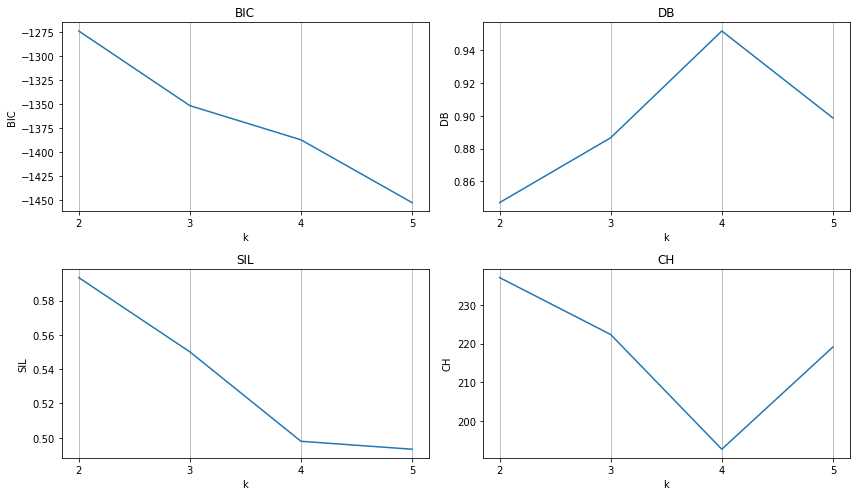

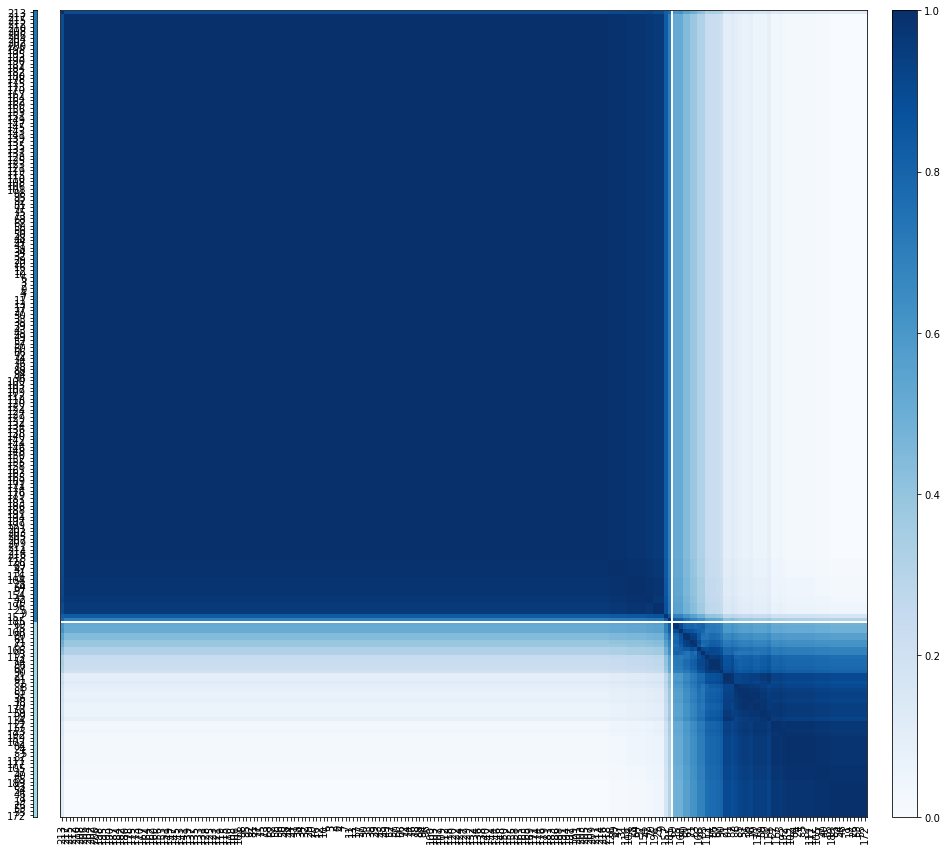

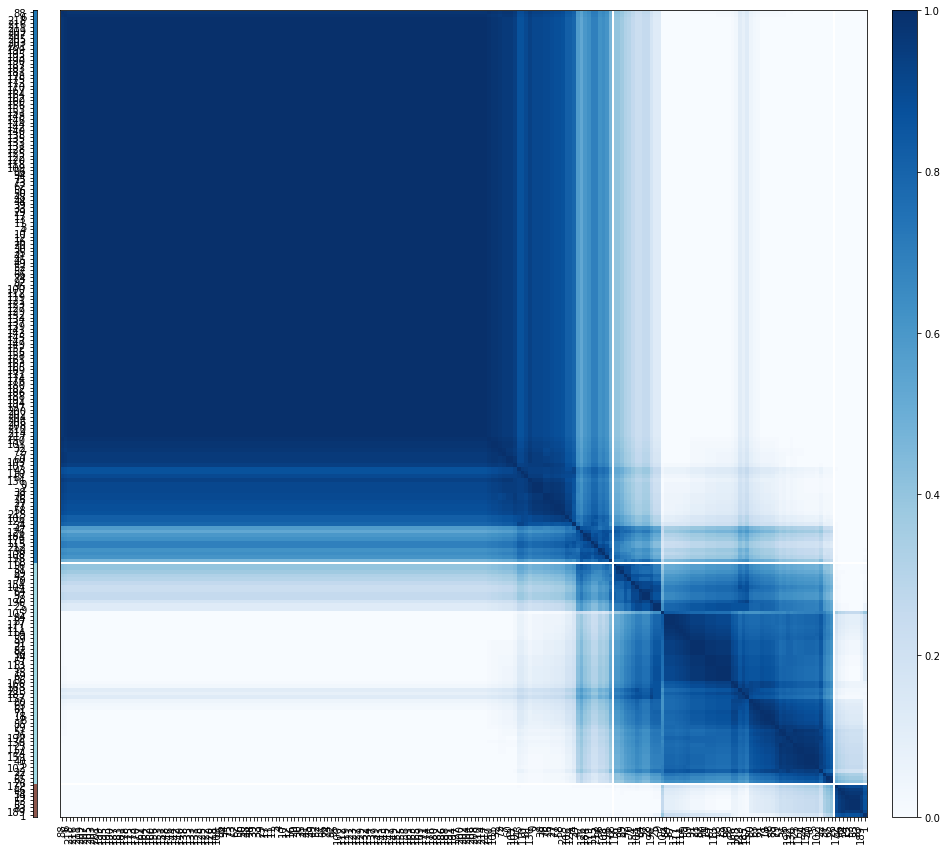

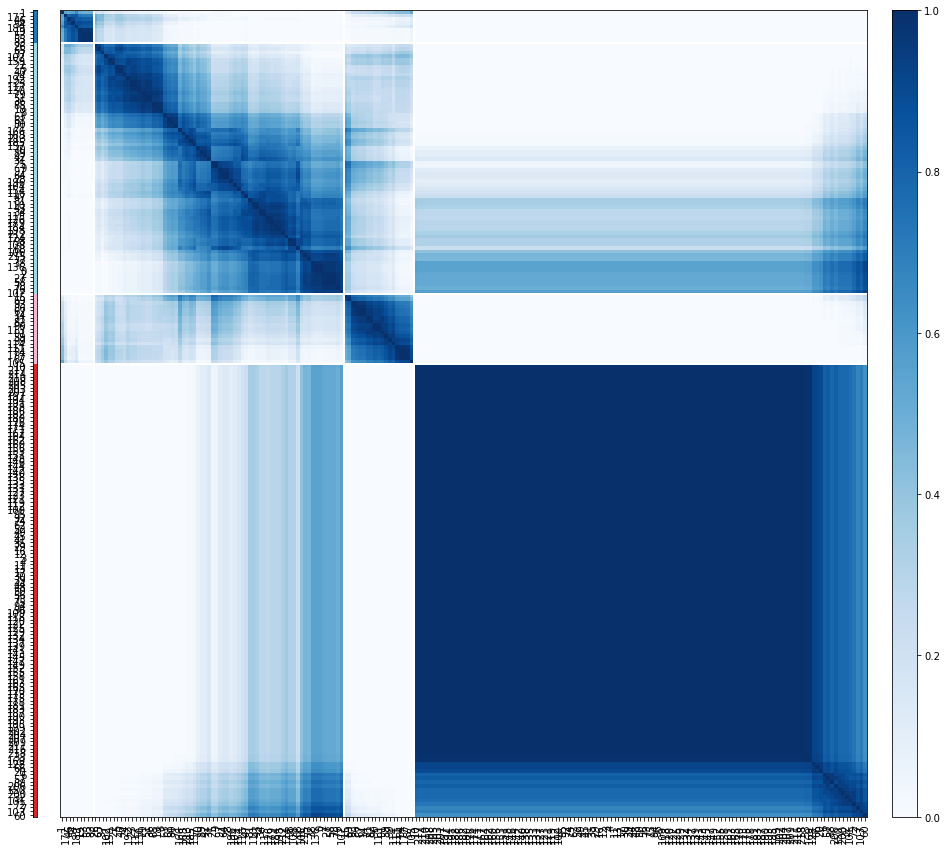

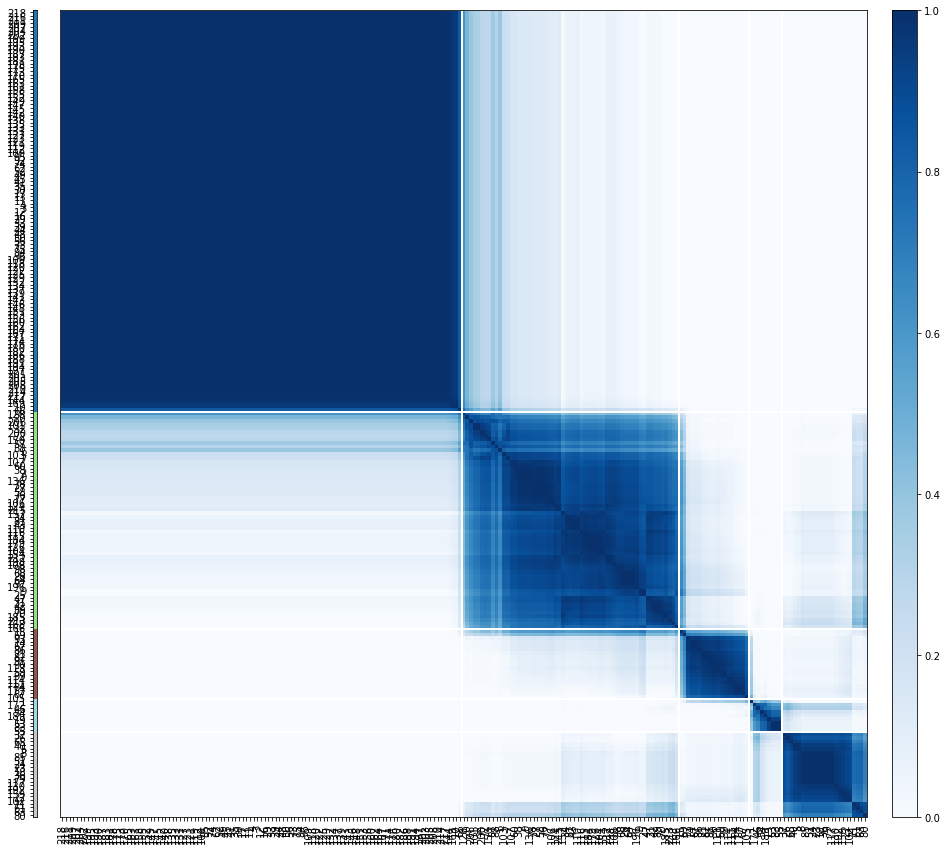

In [139]:
mckm_res_train.plot_metrics(figsize=(12, 7))

# Select a 'good' K
# At k values around 7, BIC, DB, and SIL have a (local) optimum
# ckm_res_k7 = mckm_res_train.ckmeans_results[1]
# fig = ckm_res_k7.plot(figsize=(14,14))

for ckm_res in mckm_res_train.ckmeans_results:
    fig = ckm_res.plot(figsize=(14,14))

## Testing

Metrics:
    k       sil         bic        db         ch
0   2  0.360552 -520.102287  1.015801  66.421670
1   3  0.265550 -537.910695  1.320103  55.869797
2   4  0.275149 -538.892243  1.206904  41.100385
3   5  0.204259 -541.995866  1.416616  35.292543
4   6  0.140693 -542.240208  1.648688  30.414309
5   7  0.126097 -540.361521  1.492643  26.181985
6   8  0.119090 -543.334411  1.594104  25.290828
7   9  0.089125 -541.401116  1.563430  22.773885
8  10  0.107178 -542.052008  1.507390  21.773848


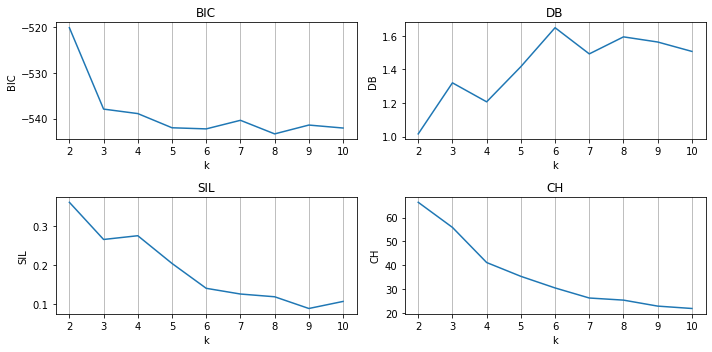

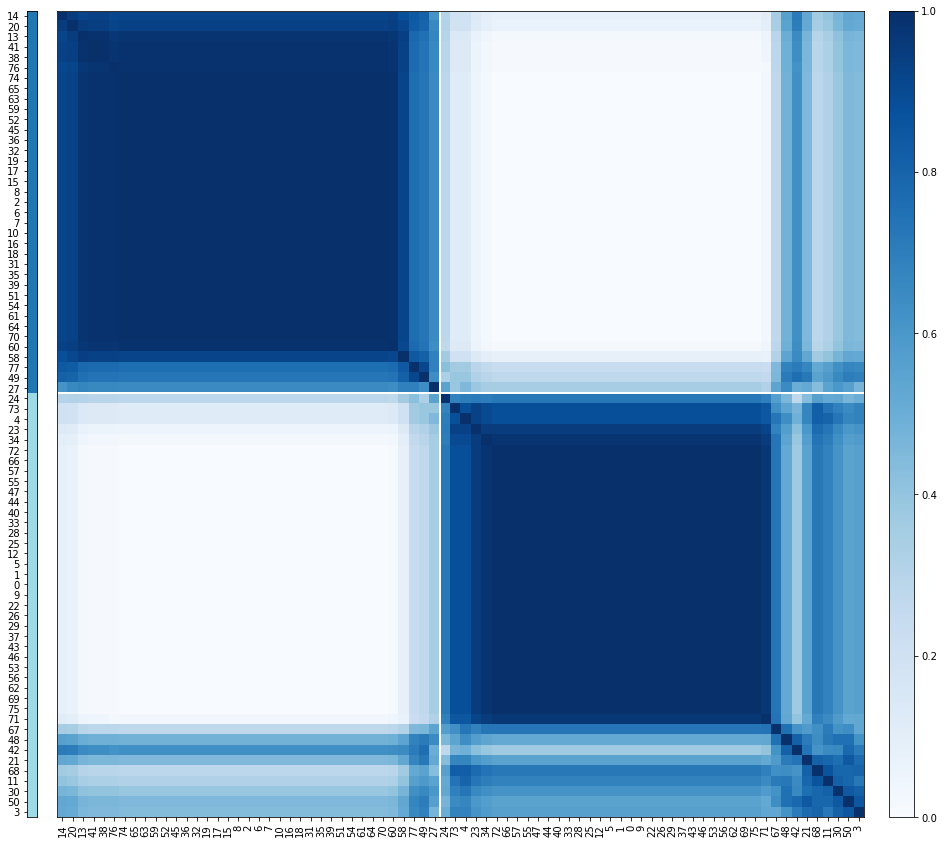

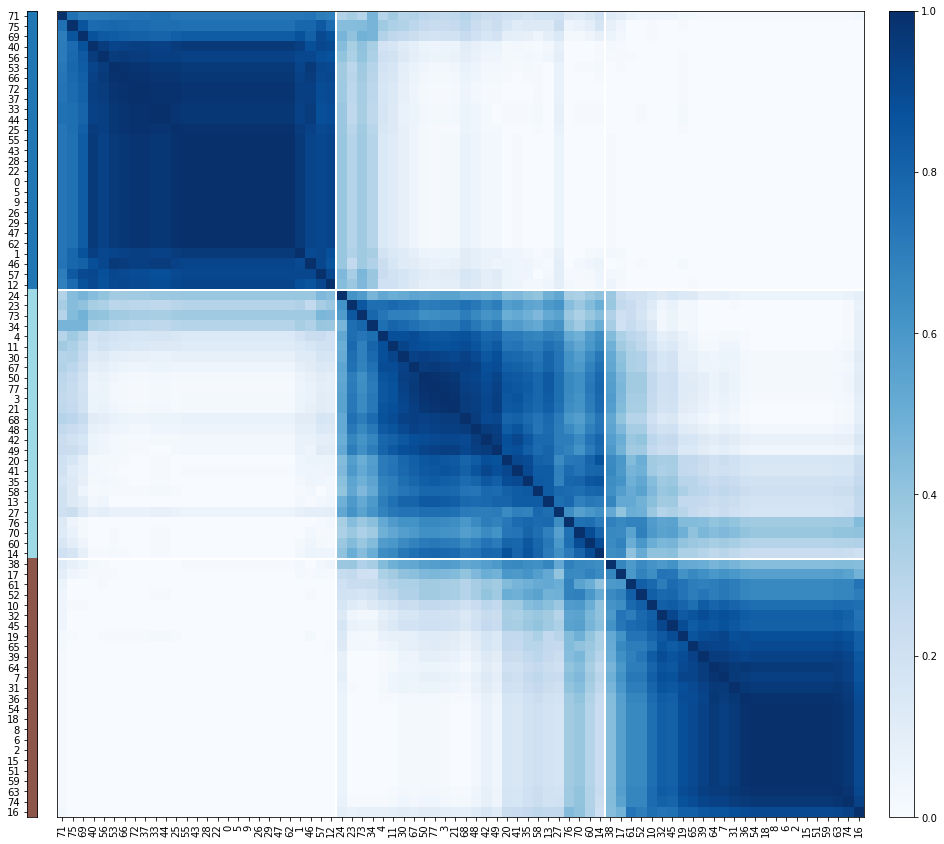

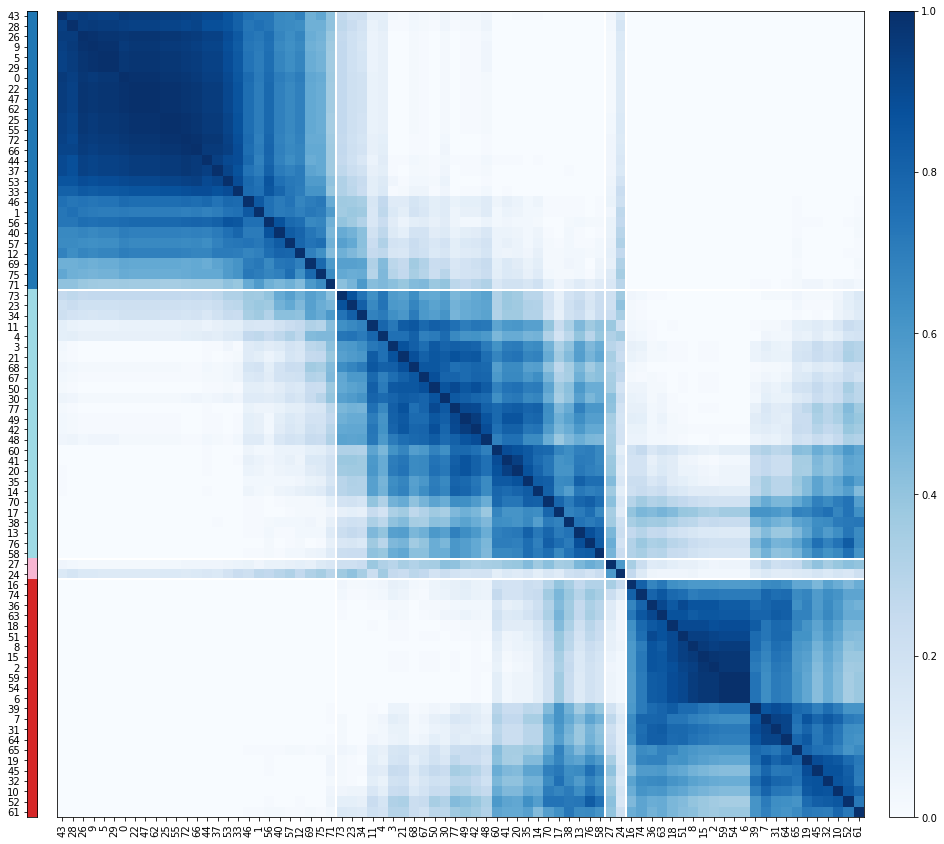

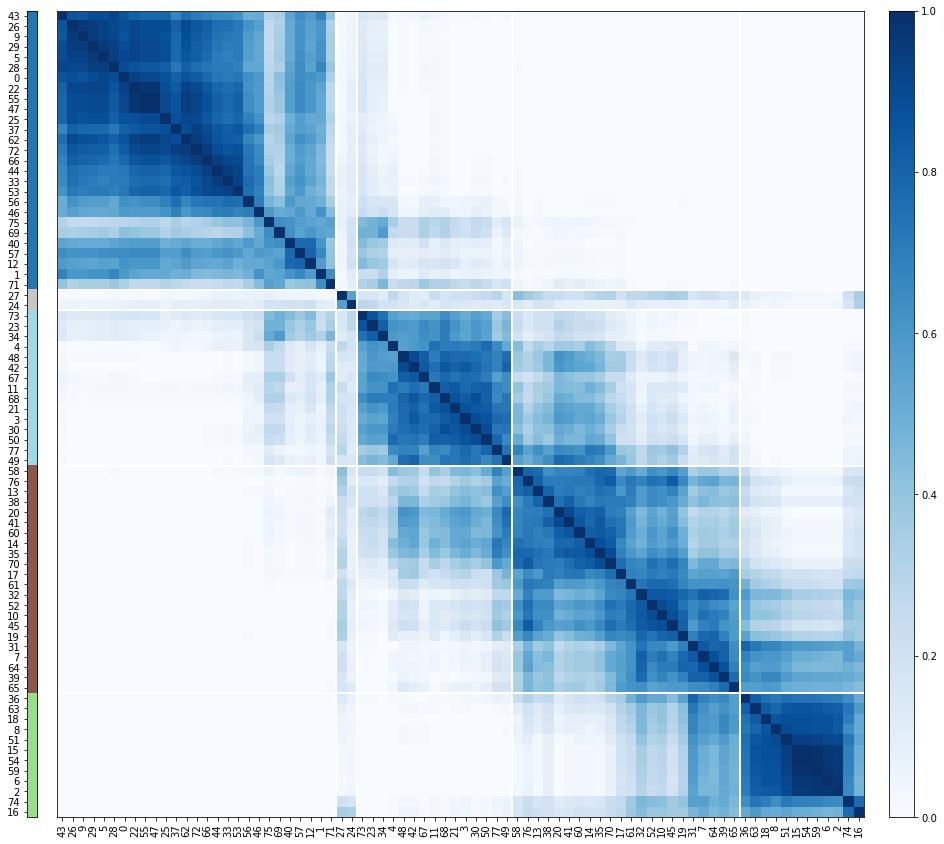

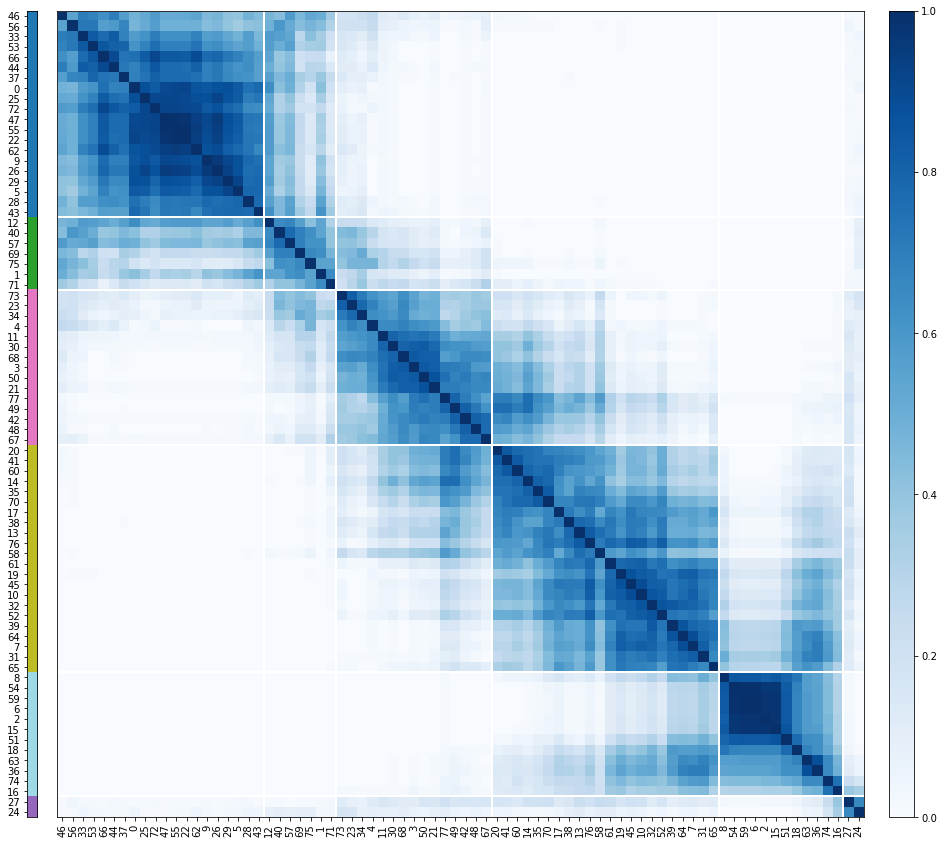

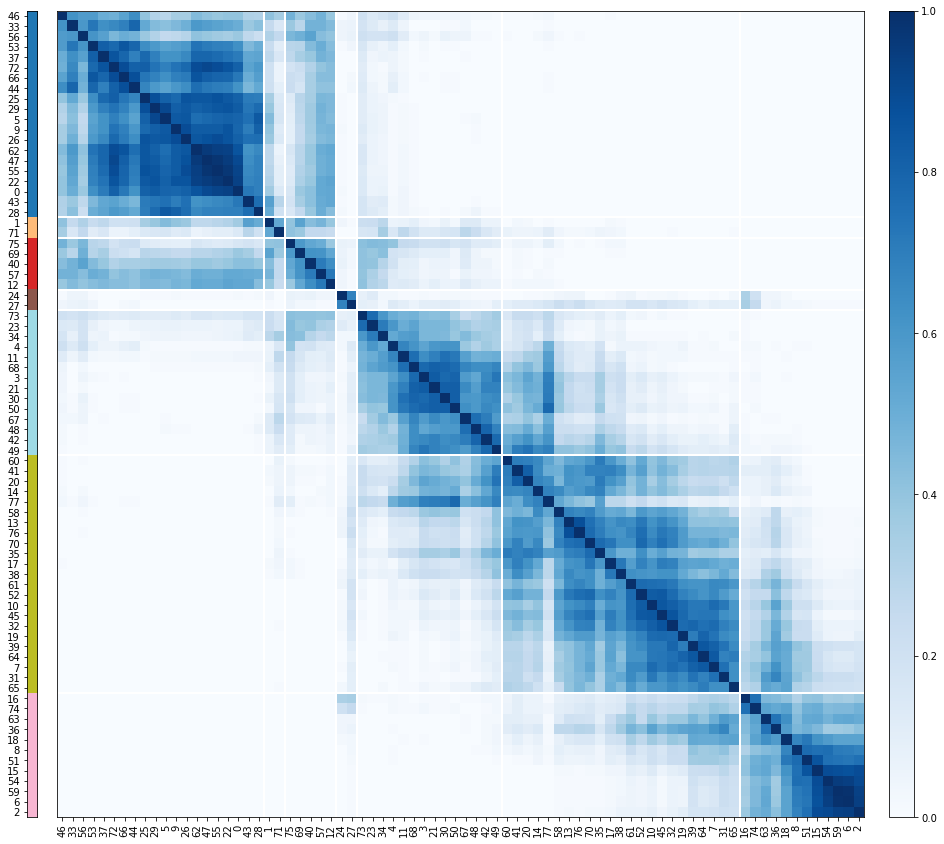

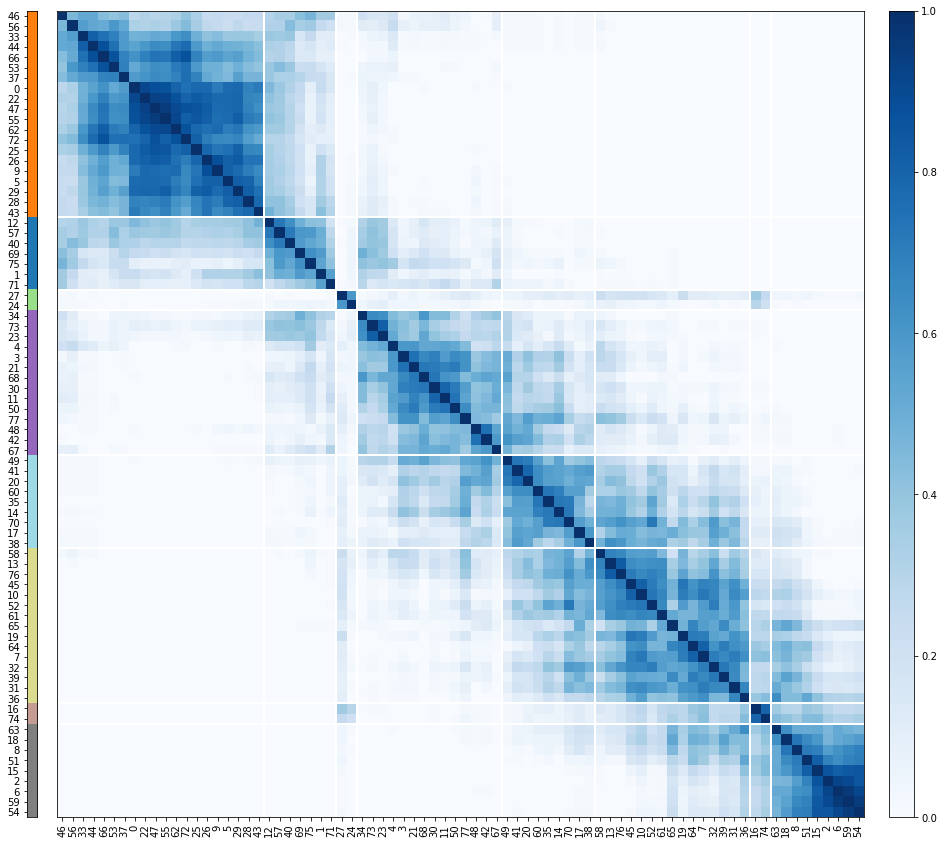

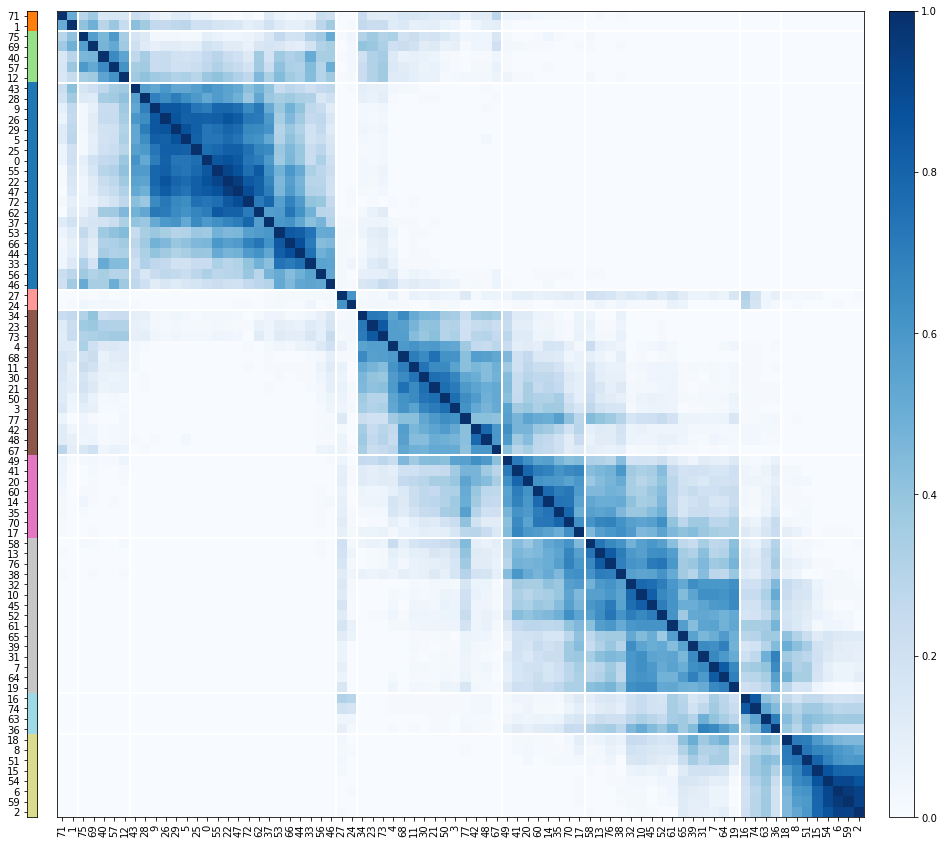

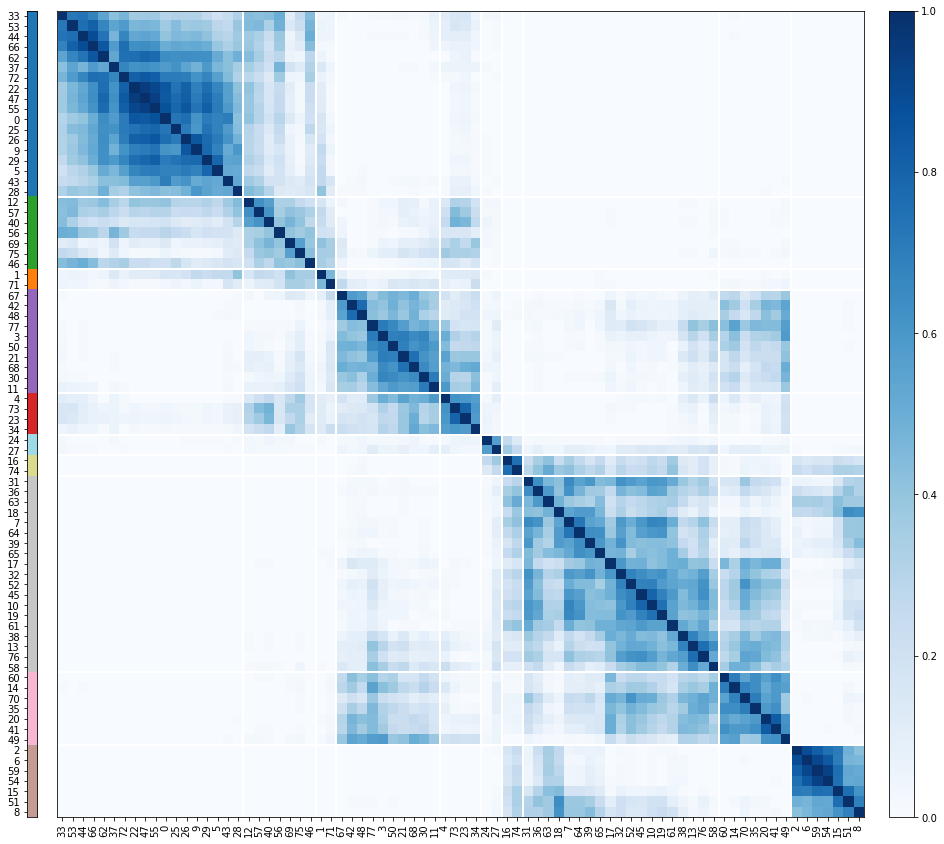

In [93]:
# clustering metrics and plots for all k
print('Metrics:')
print(mckm_res_test.metrics)

# plot clustering metrics against k
# BIC, DB: lower is better
# SIL, CH: higher is better
mckm_res_test.plot_metrics(figsize=(10,5))


# 0 |1| 2  3
for ckm_res in mckm_res_test.ckmeans_results:
    fig = ckm_res.plot(figsize=(14,14))
    
    
# ckm_res_k3 = mckm_res_test.ckmeans_results[1] # k=[2, 3, 4, 5]
# fig = ckm_res_k3.plot(figsize=(14,14))
# ...
# see "Clustering a Data Matrix (Single K)"

In [140]:
print('Cluster Membership:', ckm_res.cl)
ckm_res.cl.shape

Cluster Membership: [1 4 1 0 0 3 1 1 3 1 0 0 0 0 2 2 0 0 3 4 1 2 3 3 3 1 3 1 1 0 0 1 1 0 1 0 3
 3 1 0 3 0 1 1 0 0 4 1 0 0 0 3 0 4 4 4 0 1 1 2 1 3 0 3 1 3 0 2 1 2 1 3 1 0
 0 0 1 1 1 3 3 1 2 4 2 3 2 2 1 1 2 2 0 2 0 0 0 1 1 2 0 1 3 1 1 2 1 1 1 0 1
 2 0 2 2 1 1 3 0 0 0 0 0 0 1 0 1 0 1 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 3 0 0 0 0 0 0 1 0 1 0 0 0 4 0 0 0 0 2 0 1 0 0 0 0 1
 1 0 0 0 4 0 0 3 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0]


(219,)

## Only CD deep ulcer patients

In [125]:
mckm = MultiCKMeans(k=[2, 3, 4, 5], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(df_cd_deep_proc.values)
mckm_res_train = mckm.predict(df_cd_deep_proc.values)
# mckm_res_test = mckm.predict(gene_exp_test_proc.values)



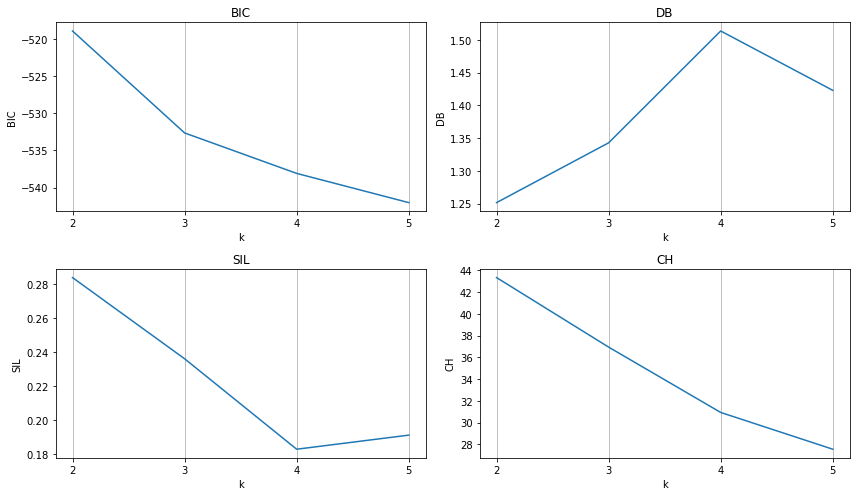

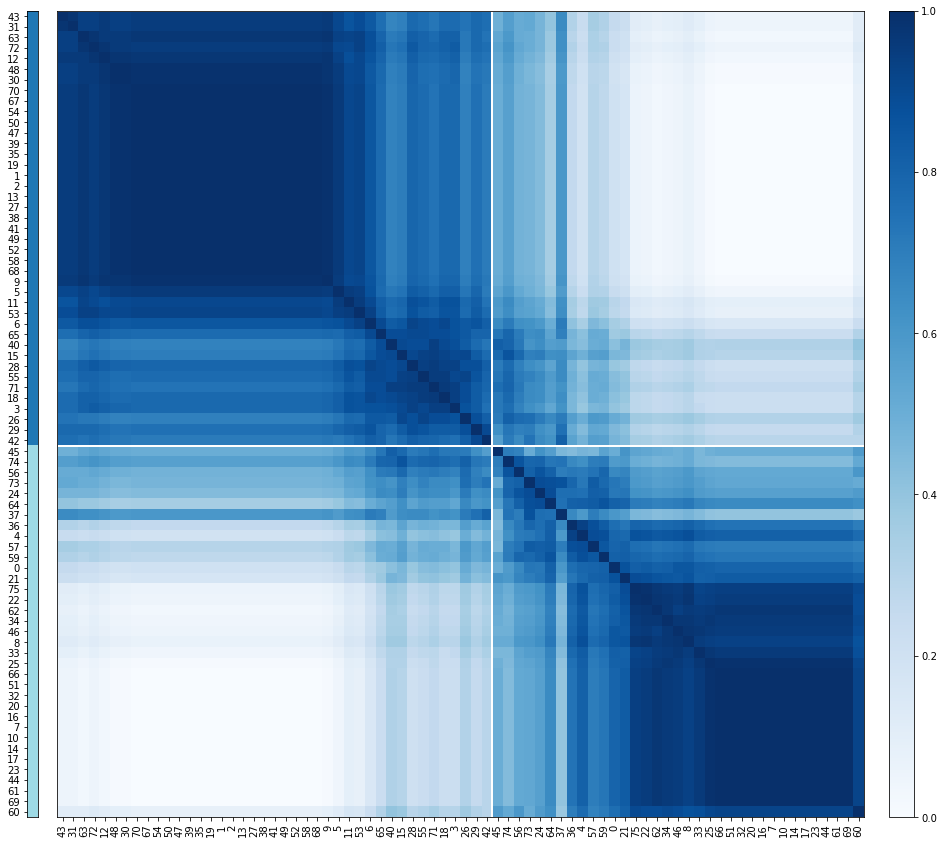

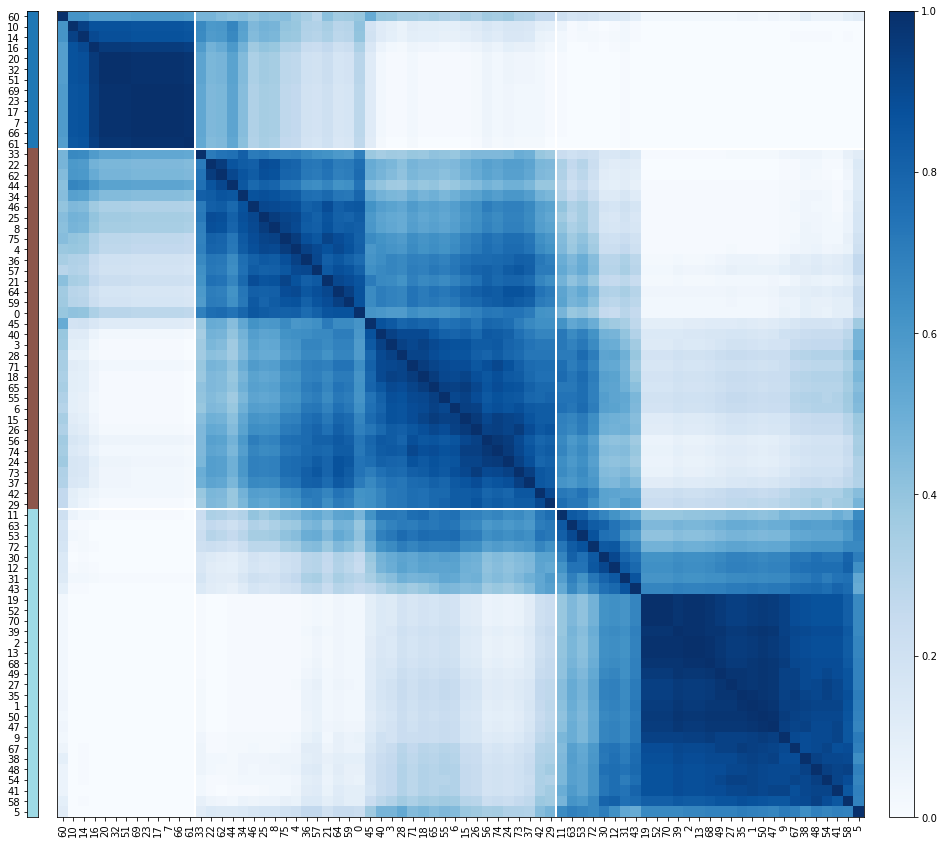

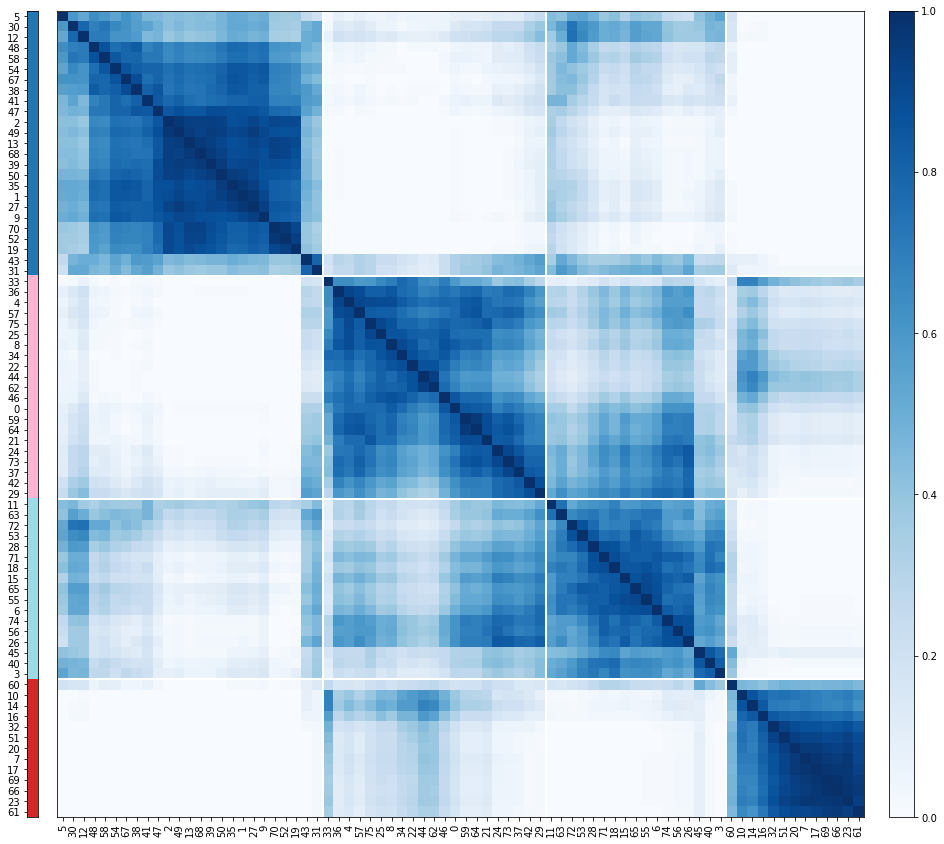

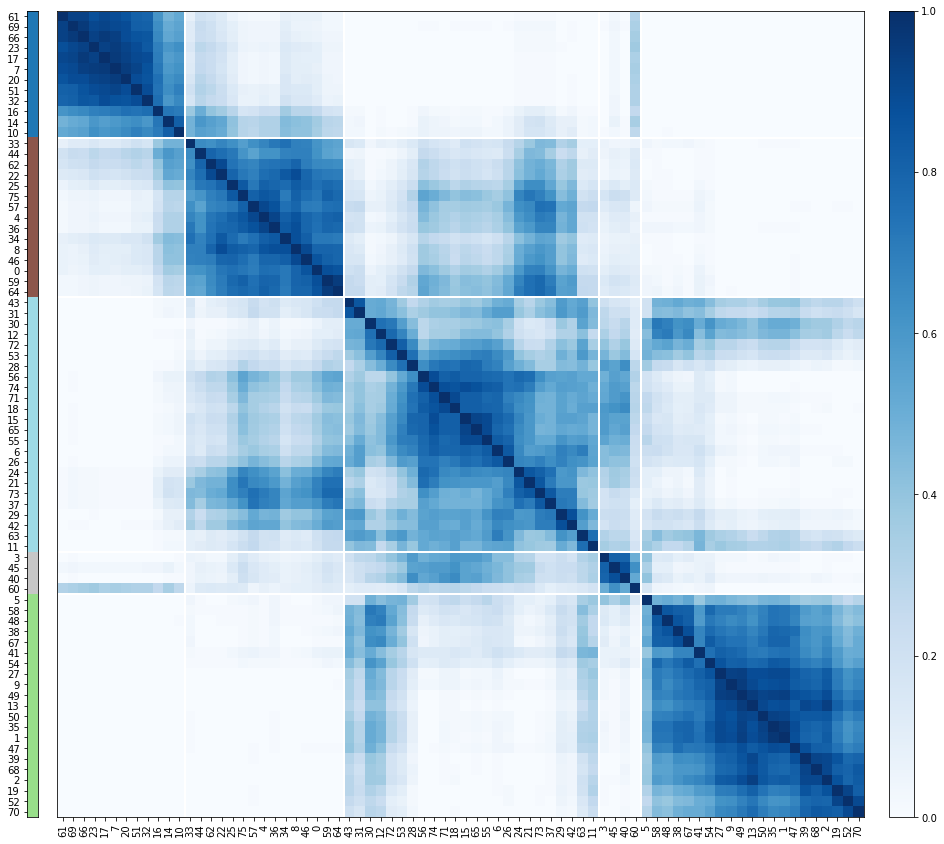

In [126]:
mckm_res_train.plot_metrics(figsize=(12, 7))


for ckm_res in mckm_res_train.ckmeans_results:
    fig = ckm_res.plot(figsize=(14,14))

## Aggregate bar plot, showing potential gene modules alongside SHAP contributions for CD deep ulcer patients

In [90]:
cd_deep_clusters = ckm_res_k3.cl
cd_deep_clusters.shape

(78,)

In [82]:
np.where(cd_deep_clusters == 0)[0]

array([ 0,  1,  4,  5,  9, 11, 12, 22, 23, 25, 26, 28, 29, 30, 33, 34, 37,
       40, 43, 44, 46, 47, 53, 55, 56, 57, 62, 66, 68, 69, 71, 72, 73, 75],
      dtype=int64)

In [88]:
shap_df = df_train_cd_deep_shap.describe().T
# shap_df["cluster_num"] = cd_deep_clusters
shap_df

,count,mean,std,min,25%,50%,75%,max
AADAC,24.0,-0.005488,0.018029,-0.029188,-0.015386,-0.009074,0.000000,0.046328
APOA1,24.0,0.040611,0.088382,-0.155963,-0.011005,0.066847,0.109386,0.152192
APOA4,24.0,-0.005575,0.026842,-0.075338,-0.018520,0.001413,0.012167,0.033261
APOB,24.0,-0.000069,0.023348,-0.043207,-0.015541,0.001891,0.013046,0.058560
APOC3,24.0,0.002390,0.017107,-0.034509,-0.003726,0.005660,0.013580,0.027500
...,...,...,...,...,...,...,...,...
RSL24D1P1,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIEN1,24.0,-0.009578,0.021956,-0.047300,-0.025683,-0.007431,0.000619,0.029404
PCBP1_AS1,24.0,-0.003485,0.034413,-0.111352,-0.009372,0.000000,0.016011,0.073698
LOC100133165,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
gene_labels = np.asarray(df_train_cd_deep_shap.columns)
gene_labels[np.where(cd_deep_clusters == 0)[0]]

array(['AADAC', 'APOA1', 'APOC3', 'AQP9', 'ABCC2', 'CRIP1', 'CSF3',
       'FOLH1', 'FPR1', 'G6PC', 'CXCL3', 'GSTA2', 'GUCA2B', 'HMGCS2',
       'IL8', 'CXCR1', 'LCN2', 'CXCL9', 'MMP7', 'MMP10', 'OSM', 'PGC',
       'SAA2', 'CXCL5', 'SELE', 'SFRP5', 'SLC13A1', 'XPNPEP2', 'SOAT2',
       'CYP4F2', 'HCAR3', 'ALDH1A2', 'MGAM', 'CLDN8'], dtype=object)

In [ ]:
agg_df.plot.barh(x="cluster_labels", y="sum", legend=None, zorder=2, color=(agg_df['sum'] > 0).map({True: 'g',False: 'r'}))

plt.title('SHAP contributions by cluster')
plt.ylabel('Gene sets')
plt.xlabel('SHAP value (sum)')
plt.xlim((-.6,.6))
for i, v in enumerate(agg_df["sum"]):
    v = np.round(v, 3)
    vt = "+{:.3f}".format(v) if v >= 0 else "{:.3f}".format(v)
    offset = -.13 if v < 0 else .02
    colour = 'darkred' if v < 0 else 'darkgreen'
    plt.text(v + offset, i + .08, vt, color=colour, zorder=3)
    plt.axhline(i,linewidth=.07, color='k', zorder=1, linestyle='--')
    
    
plt.axvline(0,linewidth=.2, color='k')
size = fig.get_size_inches()[1]
plt.axhline(size + .045*size,linewidth=.9, color='k')

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.gca().invert_yaxis()
plt.box(on=False)

plt.show()

## Fix axis labels

In [23]:
type(fig)

matplotlib.figure.Figure

In [24]:
fig.get_label()

''

In [26]:
x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()

C:\Users\shard\anaconda3\envs\pyck\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
fig.axes

In [37]:
curr_ax = fig.axes[0]

In [43]:
gene_labels = df_cd_deep.index
gene_labels.shape

(24,)

In [44]:
curr_ax.set_xticklabels(gene_labels, fontdict=None, minor=False)

[Text(0, 0, '62_CD_deep_ulcer'),
 Text(1, 0, '167_CD_deep_ulcer'),
 Text(2, 0, '196_CD_deep_ulcer'),
 Text(3, 0, '23_CD_deep_ulcer'),
 Text(4, 0, '93_CD_deep_ulcer'),
 Text(5, 0, '229_CD_deep_ulcer'),
 Text(6, 0, '46_CD_deep_ulcer'),
 Text(7, 0, '176_CD_deep_ulcer'),
 Text(8, 0, '49_CD_deep_ulcer'),
 Text(9, 0, '183_CD_deep_ulcer'),
 Text(10, 0, '50_CD_deep_ulcer'),
 Text(11, 0, '236_CD_deep_ulcer'),
 Text(12, 0, '260_CD_deep_ulcer'),
 Text(13, 0, '177_CD_deep_ulcer'),
 Text(14, 0, '212_CD_deep_ulcer'),
 Text(15, 0, '230_CD_deep_ulcer'),
 Text(16, 0, '259_CD_deep_ulcer'),
 Text(17, 0, '59_CD_deep_ulcer'),
 Text(18, 0, '98_CD_deep_ulcer'),
 Text(19, 0, '145_CD_deep_ulcer'),
 Text(20, 0, '143_CD_deep_ulcer'),
 Text(21, 0, '165_CD_deep_ulcer'),
 Text(22, 0, '70_CD_deep_ulcer'),
 Text(23, 0, '256_CD_deep_ulcer')]

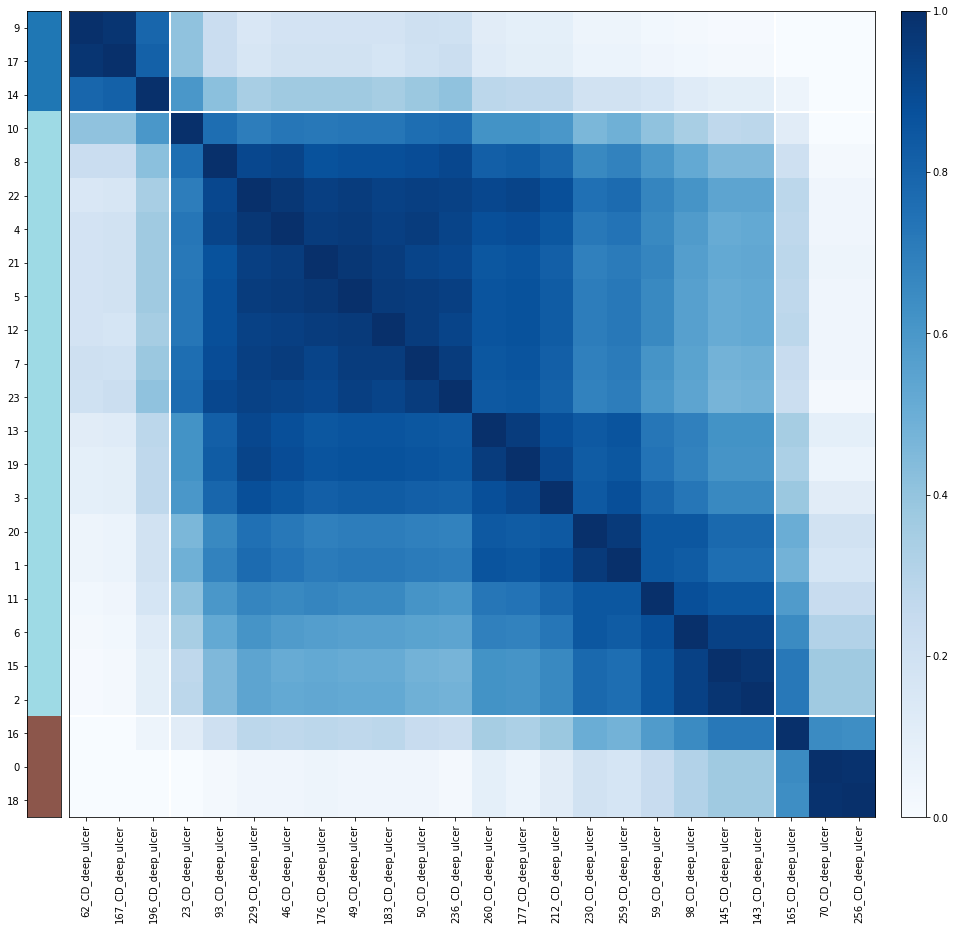

In [45]:
fig